### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))
stp = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

In [17]:
stp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


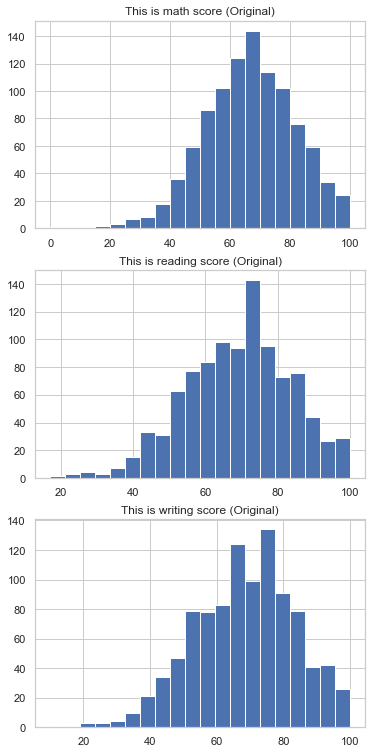

In [18]:
plt.figure(figsize=(13,13))

plt.subplot(3,2,1)
plt.hist(stp['math score'], bins=20)
plt.title('This is math score (Original)')

plt.subplot(3,2,3)
plt.hist(stp['reading score'], bins=20)
plt.title('This is reading score (Original)')

plt.subplot(3,2,5)
plt.hist(stp['writing score'], bins=20)
plt.title('This is writing score (Original)')
plt.show()

In [19]:
from scipy.stats import boxcox

math_boxcox = boxcox(stp['math score'])
reading_boxcox = boxcox(stp['reading score'])
writing_boxcox = boxcox(stp['writing score'])

ValueError: Data must be positive.

In [20]:
negative_score = []
for x in stp['math score']:
    if x <= 0:
        negative_score.append(x)
print (negative_score)

[0]


In [21]:
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
stp_nozero = stp[(stp['math score'] != 0) & (stp['reading score'] != 0) & (stp['writing score'] != 0) ]

In [23]:
stp_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
gender                         999 non-null object
race/ethnicity                 999 non-null object
parental level of education    999 non-null object
lunch                          999 non-null object
test preparation course        999 non-null object
math score                     999 non-null int64
reading score                  999 non-null int64
writing score                  999 non-null int64
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [24]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

NameError: name 'math_boxcox' is not defined

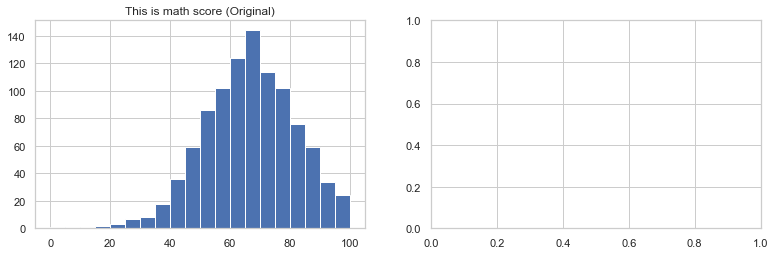

In [25]:
plt.figure(figsize=(13,13))

plt.subplot(3,2,1)
plt.hist(stp['math score'], bins=20)
plt.title('This is math score (Original)')

plt.subplot(3,2,2)
plt.hist(math_boxcox)
plt.title('This is math score (Boxcox)')

plt.subplot(3,2,3)
plt.hist(stp['reading score'], bins=20)
plt.title('This is reading score (Original)')

plt.subplot(3,2,4)
plt.hist(reading_boxcox)
plt.title('This is reading score (Boxcox)')

plt.subplot(3,2,5)
plt.hist(stp['writing score'], bins=20)
plt.title('This is writing score (Original)')

plt.subplot(3,2,6)
plt.hist(writing_boxcox)
plt.title('This is writing score (Boxcox)')
plt.show()

for i in ['math score', 'reading score', 'writing score']:
    print('---------------------------------------------')
    print('This normality test for {}'.format(i))
    print('---------------------------------------------')
    i_jb = jarque_bera(stp_nozero[i])
    i_normal = normaltest(stp_nozero[i])
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(i_jb[0], i_jb[1]))
    print("Normality test statistics is {0} and p value is {1}".format(i_normal[0], i_normal[1]), '\n')
    
    i_boxcox,_ = boxcox(stp_nozero[i])
    i_boxcox_normal = normaltest(i_boxcox)
    print('---------------------------------------------')
    print('This normality test for boxcox of {}'.format(i))
    print('---------------------------------------------')
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(i_boxcox[0], i_boxcox[1]))
    print("Normality test statistics is {0} and p value is {1}".format(i_boxcox_normal[0], i_boxcox_normal[1]), '\n')

In [26]:
math_boxcox,_ = boxcox(stp_nozero['math score'])
reading_boxcox,_ = boxcox(stp_nozero['reading score'])
writing_boxcox,_ = boxcox(stp_nozero['writing score'])

In [27]:
math_boxcox_jb = jarque_bera(math_boxcox)
reading_boxcox_jb = jarque_bera(reading_boxcox)
writing_boxcox_jb = jarque_bera(writing_boxcox)

The right side histograms are the boxcox processed graphs.
The graphs are more looked liked normal distribution, more central tendency.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [28]:
stp_nozero['total average'] = (stp_nozero['math score'] + stp_nozero['reading score'] + stp_nozero['writing score'])/3

In [29]:
stp_nozero.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Text(0.5, 1.0, 'This is total average score')

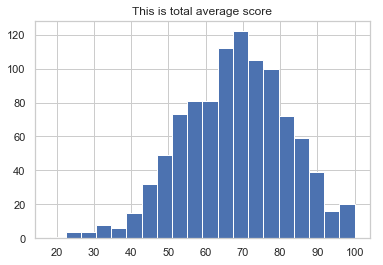

In [30]:
plt.hist(stp_nozero['total average'], bins=20)
plt.title('This is total average score')

In [31]:
total_boxcox,_ = boxcox(stp_nozero['total average'])

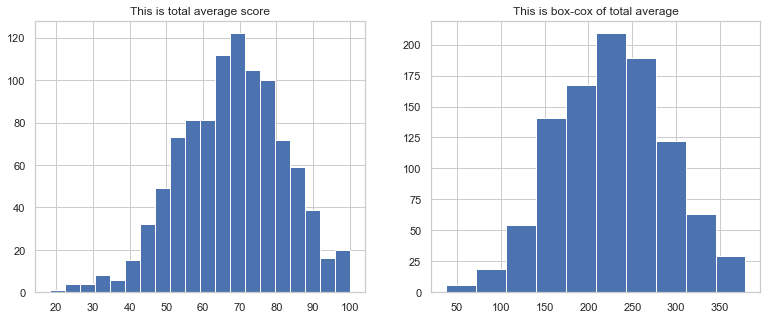

---------------------------------------------
This normality test for original Total Average
---------------------------------------------
Jarque-Bera test statistics is 10.345394363749879 and p value is 0.0056692571616785425
Normality test statistics is 10.127189207749474 and p value is 0.006322790687068094 


---------------------------------------------
This normality test for boxcox Total Average
---------------------------------------------
Jarque-Bera test statistics is 3.4323846909111793 and p value is 0.17974926966382276
Normality test statistics is 4.219879978703656 and p value is 0.12124524222064059 



In [32]:
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
plt.hist(stp_nozero['total average'], bins=20)
plt.title('This is total average score')

plt.subplot(1,2,2)
plt.hist(total_boxcox)
plt.title('This is box-cox of total average')
plt.show()

print('---------------------------------------------')
print('This normality test for original Total Average')
print('---------------------------------------------')
total_jb = jarque_bera(stp_nozero['total average'])
total_normal = normaltest(stp_nozero['total average'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(total_jb[0], total_jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(total_normal[0], total_normal[1]), '\n')
print()
print('---------------------------------------------')
print('This normality test for boxcox Total Average')
print('---------------------------------------------')
total_bcjb = jarque_bera(total_boxcox)
total_bcn = normaltest(total_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(total_bcjb[0], total_bcjb[1]))
print("Normality test statistics is {0} and p value is {1}".format(total_bcn[0], total_bcn[1]), '\n')

This 'Total Average' case is also the same codition with above. The boxcox total average graph looks more normal distribution.  
We can find out easily with the Jarque-bera and Normality test results.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [34]:
stp_nozero.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


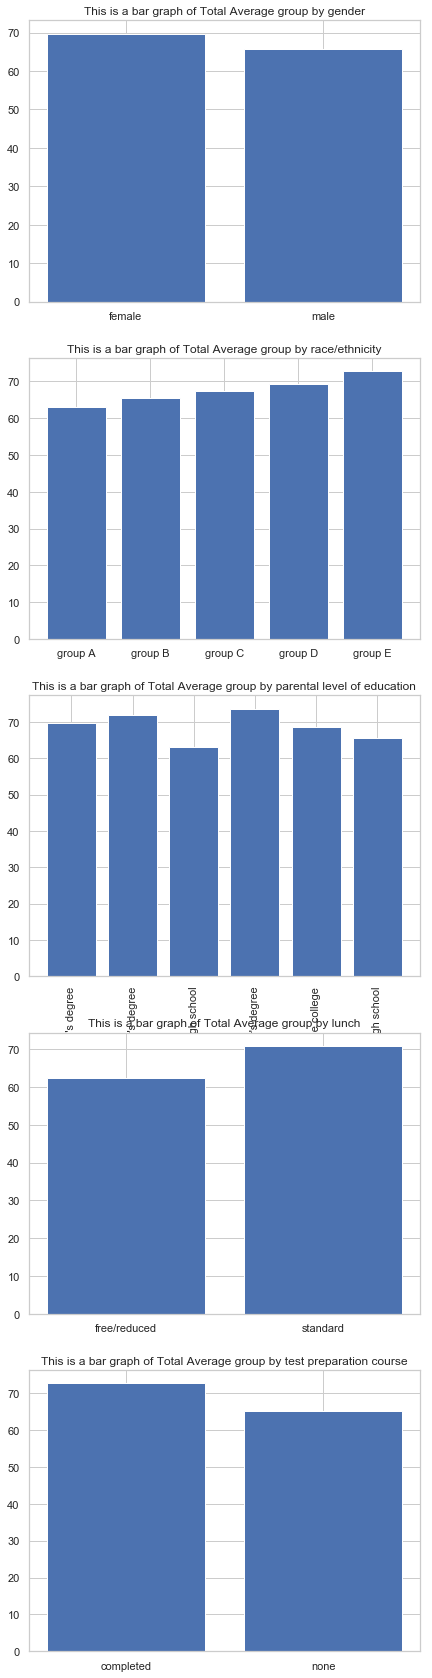

In [52]:
plt.figure(figsize=(7,30))

plt.subplot(5,1,1)
plt.bar(stp_nozero.groupby('gender')['total average'].mean().index, 
        stp_nozero.groupby('gender')['total average'].mean())
plt.title('This is a bar graph of Total Average group by gender')

plt.subplot(5,1,2)
plt.bar(stp_nozero.groupby('race/ethnicity')['total average'].mean().index, 
        stp_nozero.groupby('race/ethnicity')['total average'].mean())
plt.title('This is a bar graph of Total Average group by race/ethnicity')

plt.subplot(5,1,3)
plt.bar(stp_nozero.groupby('parental level of education')['total average'].mean().index, 
        stp_nozero.groupby('parental level of education')['total average'].mean())
plt.title('This is a bar graph of Total Average group by parental level of education')
plt.xticks(rotation=90)

plt.subplot(5,1,4)
plt.bar(stp_nozero.groupby('lunch')['total average'].mean().index, 
        stp_nozero.groupby('lunch')['total average'].mean())
plt.title('This is a bar graph of Total Average group by lunch')

plt.subplot(5,1,5)
plt.bar(stp_nozero.groupby('test preparation course')['total average'].mean().index, 
        stp_nozero.groupby('test preparation course')['total average'].mean())
plt.title('This is a bar graph of Total Average group by test preparation course')

plt.show()

If I want to clarify this problem I should make some coding that set everything is the same but change just one condition. Then It would be clear to differentiate those.  

For example,  
If I want to check whether the target varible is sex or not, then I should set all the variables are in the same and just change sex. Next, I should check the coefficient.

AttributeError: Unknown property squre

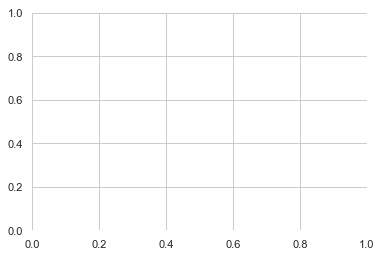

In [53]:
corrmat_student = stp_nozero.corr()

sns.heatmap(corrmat_student, squre=True, annot = True, linewidth=0.5)
plt.title("correlation matrix (student performance)")

plt.show()